#### **EDA for Supply Chain Inventory**
----

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset 

In [9]:
df = pd.read_csv("Train.csv")
print(df.shape)
print(df.head())

(10999, 12)
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233

### Data Overview


In [10]:
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Stats:")
print(df.describe(include="all"))


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None

Missing Values:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
C


### 3. Target Variable
-----------------------

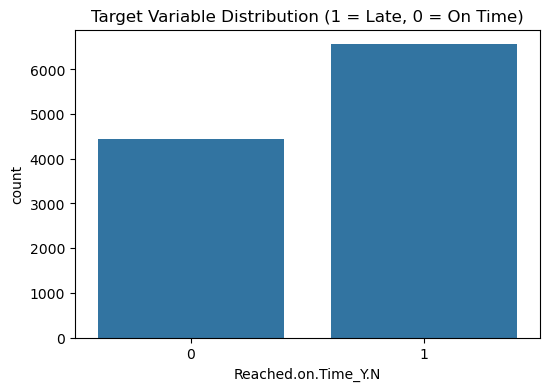

Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


In [11]:

plt.figure(figsize=(6,4))
sns.countplot(x="Reached.on.Time_Y.N", data=df)
plt.title("Target Variable Distribution (1 = Late, 0 = On Time)")
plt.show()

print(df["Reached.on.Time_Y.N"].value_counts(normalize=True))

### Categorical Features
-------------------------

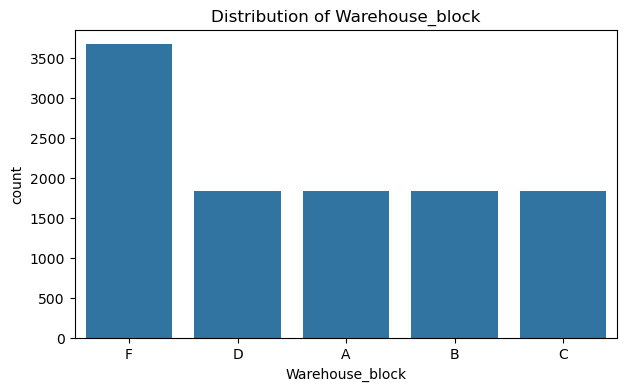

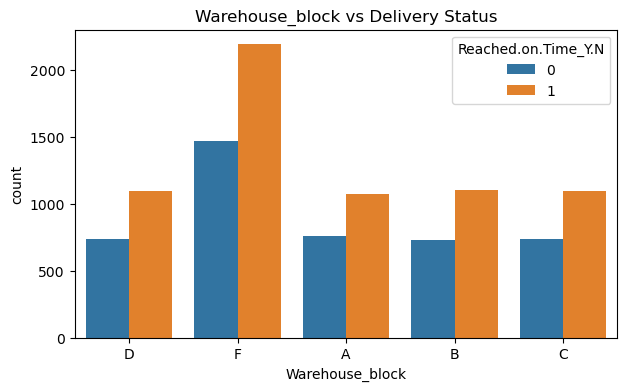

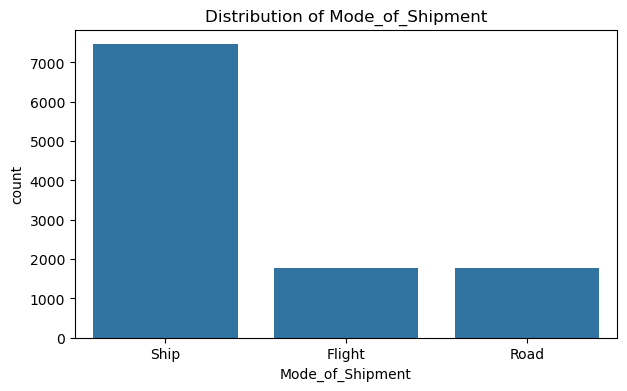

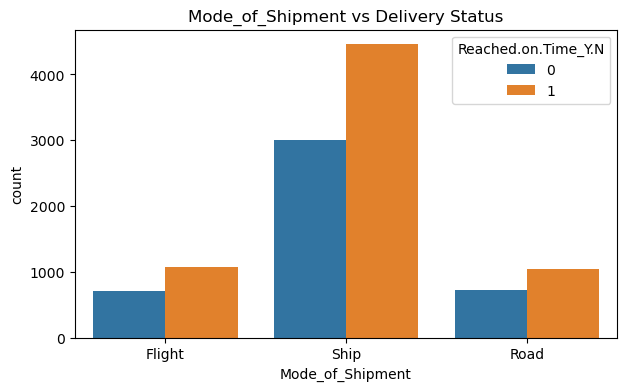

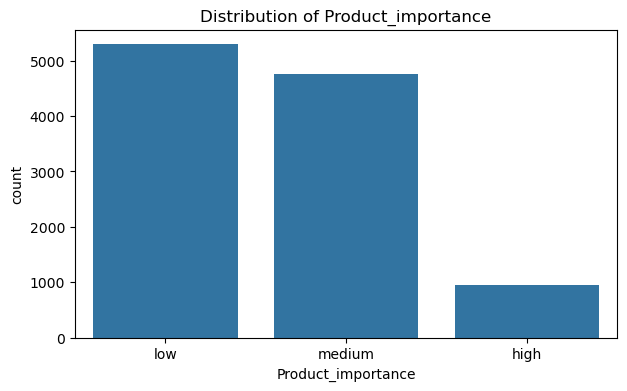

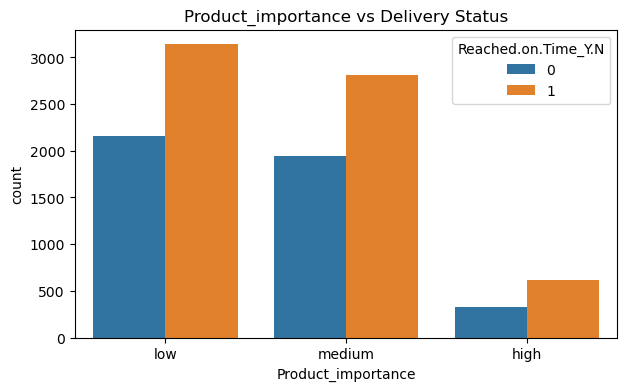

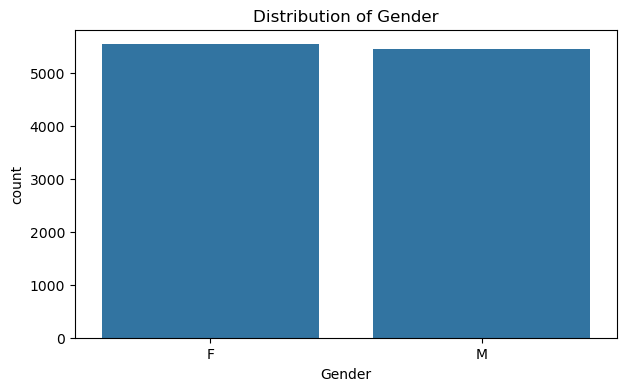

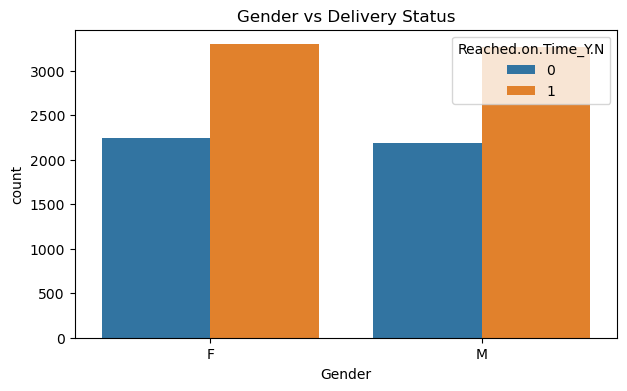

In [13]:
categorical_cols = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"]

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

    # Relation with target
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue="Reached.on.Time_Y.N", data=df)
    plt.title(f"{col} vs Delivery Status")
    plt.show()

### Numerical Features
-------

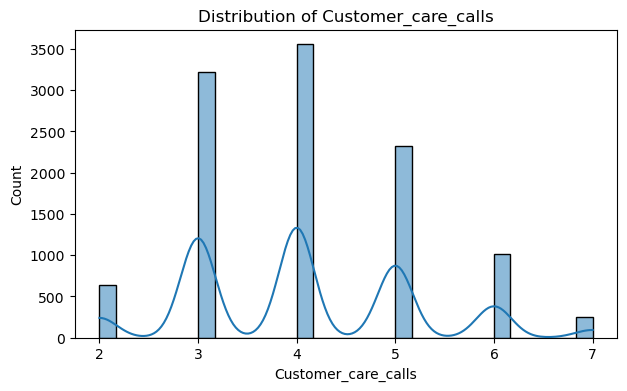

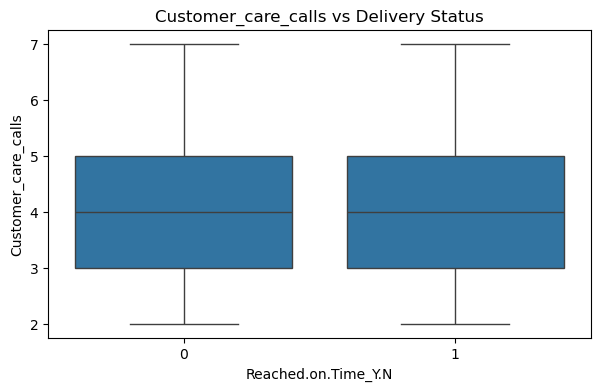

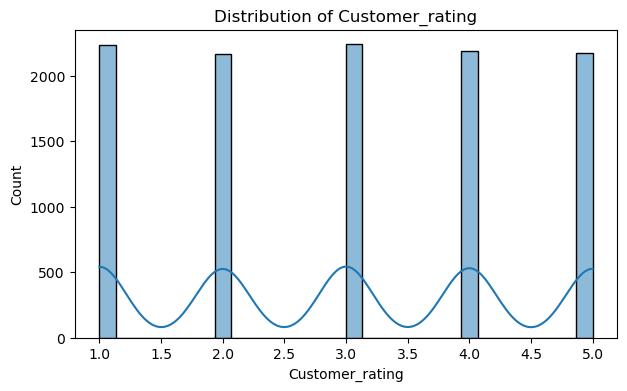

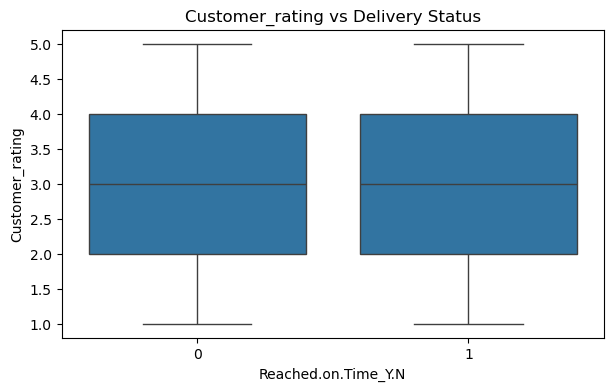

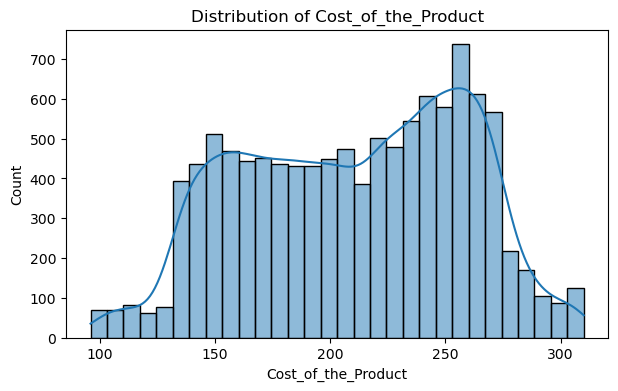

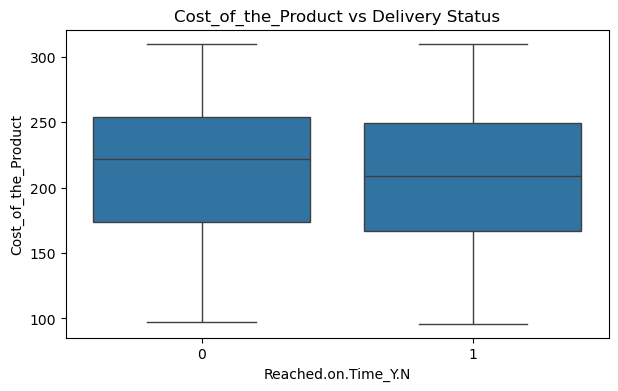

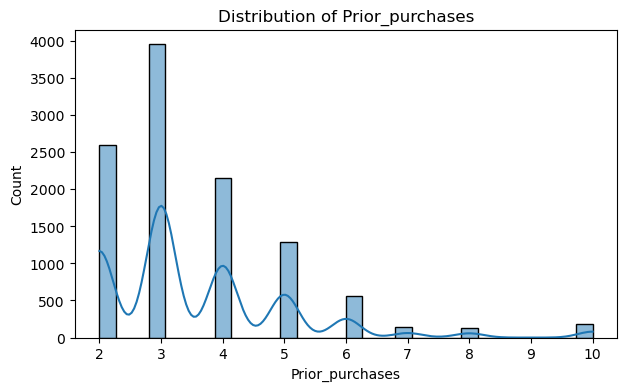

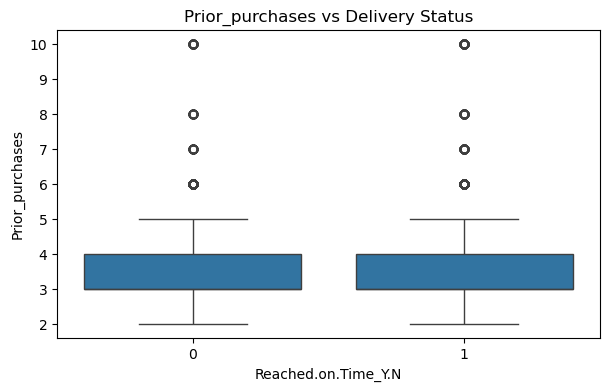

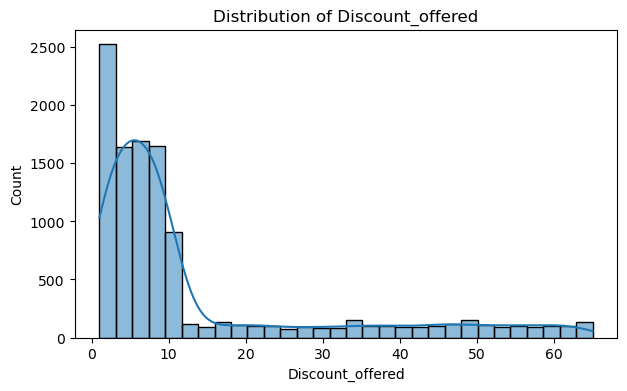

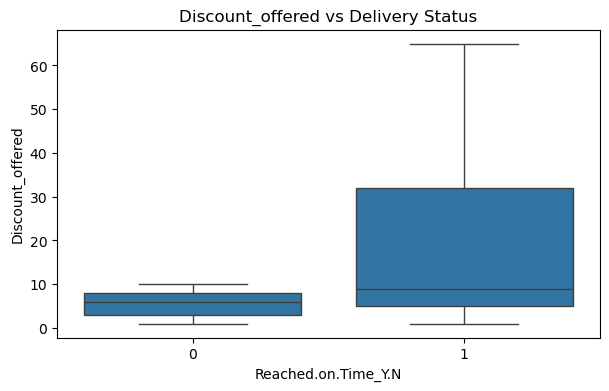

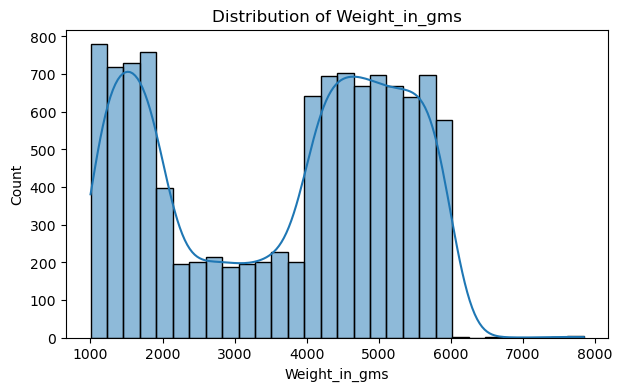

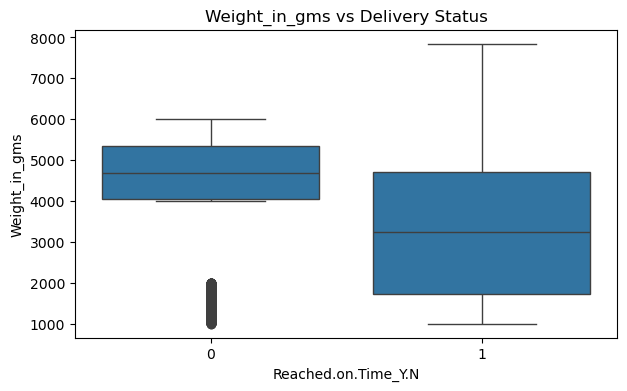

In [14]:

numeric_cols = ["Customer_care_calls", "Customer_rating", "Cost_of_the_Product",
                "Prior_purchases", "Discount_offered", "Weight_in_gms"]

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(7,4))
    sns.boxplot(x="Reached.on.Time_Y.N", y=col, data=df)
    plt.title(f"{col} vs Delivery Status")
    plt.show()

### Correlation Heatmap
-------------

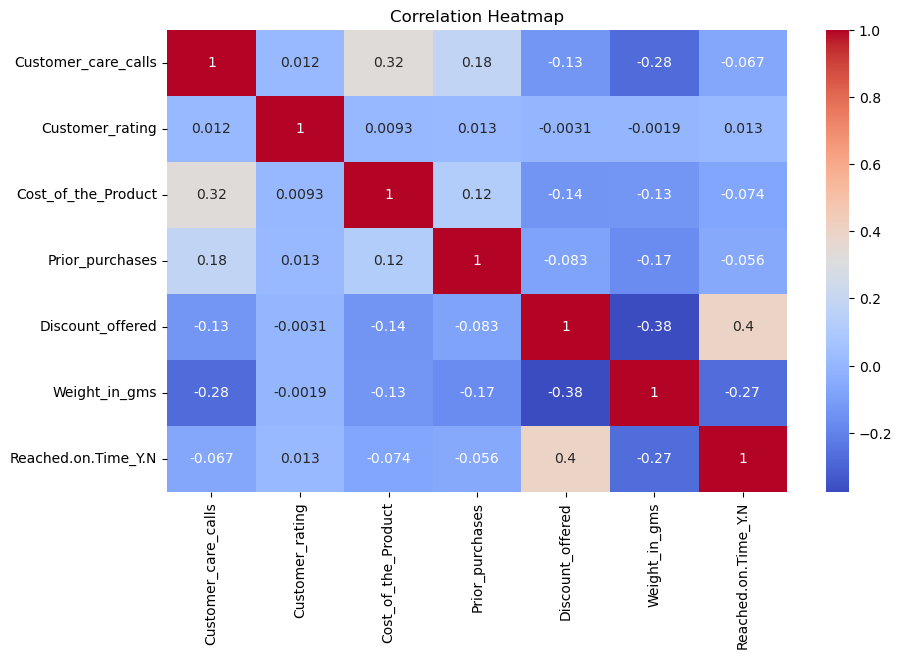

In [15]:

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols + ["Reached.on.Time_Y.N"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Key Insights
--------------

In [16]:

print("\nAverage cost by delivery status:")
print(df.groupby("Reached.on.Time_Y.N")["Cost_of_the_Product"].mean())

print("\nAverage discount by delivery status:")
print(df.groupby("Reached.on.Time_Y.N")["Discount_offered"].mean())

print("\nAverage weight by delivery status:")
print(df.groupby("Reached.on.Time_Y.N")["Weight_in_gms"].mean())


Average cost by delivery status:
Reached.on.Time_Y.N
0    214.498647
1    207.289197
Name: Cost_of_the_Product, dtype: float64

Average discount by delivery status:
Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

Average weight by delivery status:
Reached.on.Time_Y.N
0    4168.668395
1    3272.640104
Name: Weight_in_gms, dtype: float64
